<a href="https://colab.research.google.com/github/yodhasu/Code-Archive/blob/machine-learning/Arimatest_on_air_polution_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

data source: https://www.kaggle.com/datasets/jedijamarimanullang/jakarta-daily-air-quality

In [101]:
df = pd.read_csv('jakarta-central (us consulate) indonesia-air-quality.csv', parse_dates=True)

df

,date,pm25,pm10
0,2020/12/1,37,31
1,2020/12/2,59,31
2,2020/12/3,60,31
3,2020/12/4,59,26
4,2020/12/5,43,29
...,...,...,...
1828,2015/9/15,,104
1829,2015/9/16,,81
1830,2015/9/17,,93
1831,2015/9/18,,86


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1833 non-null   object
 1    pm25   1833 non-null   object
 2    pm10   1833 non-null   object
dtypes: object(3)
memory usage: 43.1+ KB


In [103]:
from sklearn import preprocessing

df['date'] = pd.to_datetime(df['date'])

In [104]:
df[' pm25'] = df[' pm25'].str.strip()
df[' pm10'] = df[' pm10'].str.strip()

In [105]:
df[' pm25'] = pd.to_numeric(df[' pm25'])
df[' pm10'] = pd.to_numeric(df[' pm10'])

In [106]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1833 non-null   datetime64[ns]
 1    pm25   1703 non-null   float64       
 2    pm10   1002 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 43.1 KB


,date,pm25,pm10
count,1833,1703.000000,1002.000000
mean,2018-05-13 21:45:39.770867456,97.788608,52.469062
min,2015-07-16 00:00:00,7.000000,1.000000
25%,2017-01-22 00:00:00,76.000000,40.000000
50%,2018-05-26 00:00:00,101.000000,55.000000
75%,2019-09-03 00:00:00,121.000000,64.000000
max,2020-12-07 00:00:00,209.000000,209.000000
std,NaN,30.111504,19.047172


<Axes: >

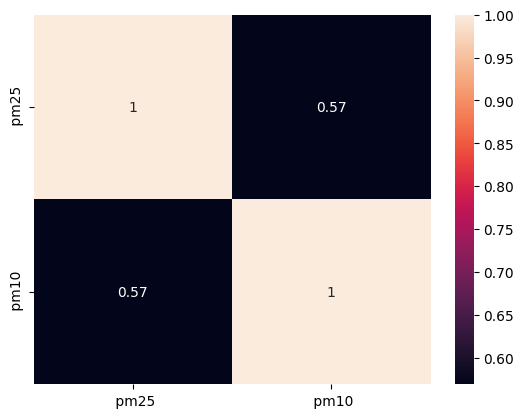

In [107]:
from sklearn import metrics

corrmat = df.corr(numeric_only= True)

sb.heatmap(corrmat, annot = True)

<Axes: ylabel=' pm25'>

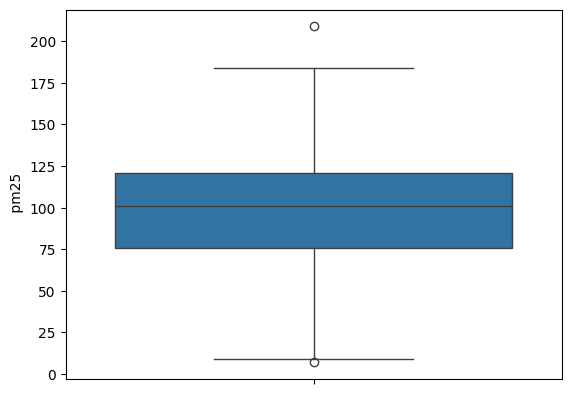

In [108]:
sb.boxplot(df[' pm25'])

<Axes: ylabel=' pm10'>

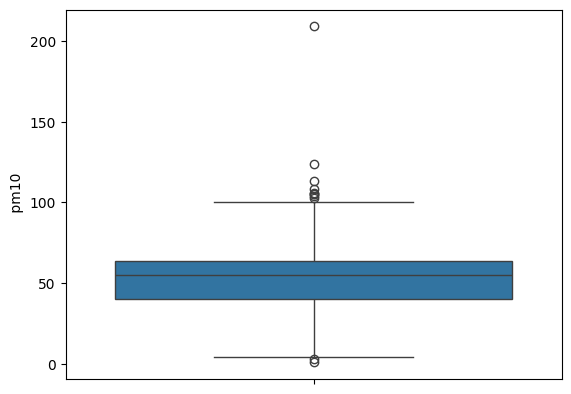

In [109]:
sb.boxplot(df[' pm10'])

In [110]:
dfdrop = df.drop(columns=[' pm10'], axis = 1)

dfdrop.info()

dfdrop.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1833 non-null   datetime64[ns]
 1    pm25   1703 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.8 KB


,date,pm25
count,1833,1703.000000
mean,2018-05-13 21:45:39.770867456,97.788608
min,2015-07-16 00:00:00,7.000000
25%,2017-01-22 00:00:00,76.000000
50%,2018-05-26 00:00:00,101.000000
75%,2019-09-03 00:00:00,121.000000
max,2020-12-07 00:00:00,209.000000
std,NaN,30.111504


In [111]:
import numpy as np
import random as rd

# dfnoout = dfdrop[' pm25'].apply(lambda l: l if not np.isnan(l) else np.random.choice([76, 121]))
# dfnoout = dfdrop[' pm25'].apply(lambda n: rd.randint(101, 121) or rd.randint(76, 100))
dfnoout = dfdrop.dropna()

In [112]:
# dfnoout = dfnoout.to_frame()

dfnoout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1703 entries, 0 to 1702
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1703 non-null   datetime64[ns]
 1    pm25   1703 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.9 KB


In [113]:
dfnoout

,date,pm25
0,2020-12-01,37.0
1,2020-12-02,59.0
2,2020-12-03,60.0
3,2020-12-04,59.0
4,2020-12-05,43.0
...,...,...
1698,2015-12-27,94.0
1699,2015-12-28,91.0
1700,2015-12-29,98.0
1701,2015-12-30,64.0


In [114]:
dfnooutdate = dfnoout.set_index(dfnoout['date']).drop(columns=['date'], axis = 1)

In [115]:
dfnooutdate = dfnooutdate.sort_index()
# dfnooutdate = dfnooutdate.resample('1W', label='right').mean()

In [116]:
dfnooutdate

,pm25
date,
2015-12-25,39.0
2015-12-26,81.0
2015-12-27,94.0
2015-12-28,91.0
2015-12-29,98.0
...,...
2020-12-03,60.0
2020-12-04,59.0
2020-12-05,43.0


In [117]:
dfnooutdate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1703 entries, 2015-12-25 to 2020-12-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   1703 non-null   float64
dtypes: float64(1)
memory usage: 26.6 KB


In [118]:
dfnooutdate.isna().value_counts()

 pm25
False    1703
Name: count, dtype: int64

In [119]:
dfnooutdate = dfnooutdate.dropna()
dfnooutdate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1703 entries, 2015-12-25 to 2020-12-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   1703 non-null   float64
dtypes: float64(1)
memory usage: 26.6 KB


<Axes: >

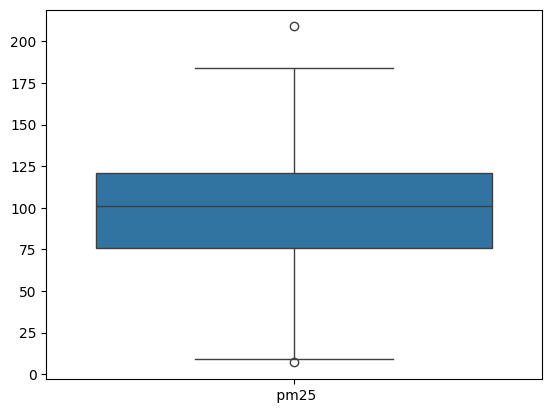

In [120]:
sb.boxplot(dfnoout)

In [121]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfnooutdate[' pm25'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.3920018715836715
n_lags: 3.5207156811936034e-06
p-value: 3.5207156811936034e-06
Critial Values:
   1%, -3.4342184244873657
Critial Values:
   5%, -2.8632486915862247
Critial Values:
   10%, -2.567679662838086


data is stationery

In [122]:
import numpy as np

msk = (dfnoout.index < len(dfnoout)-20)

df_train = dfnoout[msk].copy()
df_test = dfnoout[~msk].copy()

# dftrain = dfnoout.iloc[:-30]
# dftest = dfnoout.iloc[-30]

# dftrain = dfnooutdate.sample(frac = 0.7)
# dftest = dfnooutdate.drop(dftrain.index)

dfTrain, dfTest= np.split(dfnooutdate, [int(0.8*len(dfnooutdate))])

In [123]:
dfTrain = dfTrain.sort_index()
dfTest = dfTest.sort_index()

print(dfTrain.tail())
print(dfTest.tail())

print(dfTrain.info())
print(dfTest.info())

             pm25
date             
2019-11-19   74.0
2019-11-20   96.0
2019-11-21  106.0
2019-11-22  122.0
2019-11-23  138.0
             pm25
date             
2020-12-03   60.0
2020-12-04   59.0
2020-12-05   43.0
2020-12-06   63.0
2020-12-07   48.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1362 entries, 2015-12-25 to 2019-11-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   1362 non-null   float64
dtypes: float64(1)
memory usage: 21.3 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341 entries, 2019-11-24 to 2020-12-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   341 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB
None


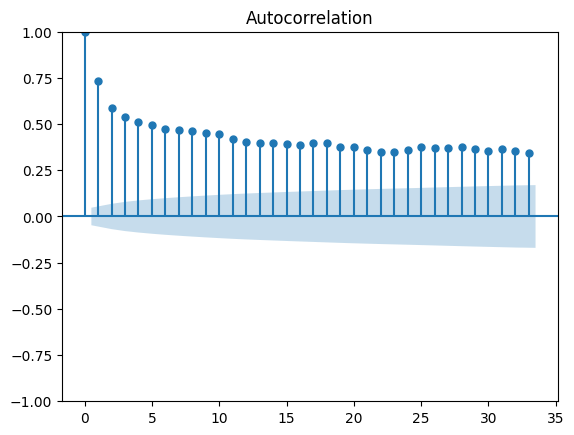

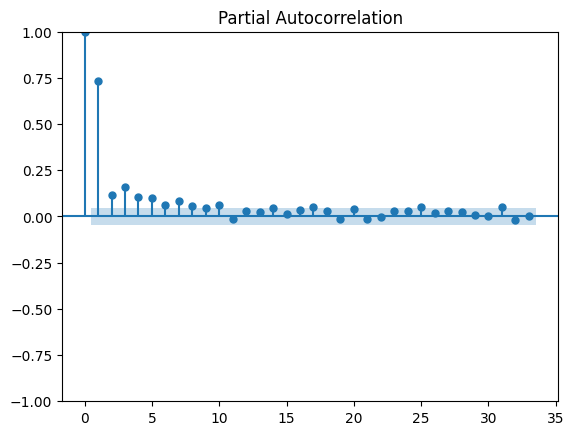

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(dfnooutdate[' pm25'])

pacf = plot_pacf(dfnooutdate[' pm25'])

In [125]:
!pip install pmdarima

In [126]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA as arima

automodel = pm.auto_arima(dfnooutdate[' pm25'], trace=True, suppress_warnings=True, start_p=0, start_q=0, max_order=4, test = 'adf', seasonal=True)
automodel

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16433.019, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15117.857, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15610.553, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20598.133, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=15098.125, Time=0.61 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=15054.892, Time=0.95 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=15038.013, Time=0.60 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=15022.076, Time=0.77 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=14991.606, Time=4.92 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=14984.440, Time=5.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14980.762, Time=3.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14981.084, Time=2.74 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=14982.473, Time=5.30 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14978.095, Time=3.38 sec
 ARIMA(1,0,2)(0,0,0

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [127]:
print(automodel.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1703
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -7483.048
Date:                Tue, 14 May 2024   AIC                          14978.095
Time:                        06:08:51   BIC                          15010.736
Sample:                             0   HQIC                         14990.178
                               - 1703                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5177      0.551      2.753      0.006       0.437       2.598
ar.L1          1.2861      0.069     18.723      0.000       1.151       1.421
ar.L2         -0.3017      0.065     -4.623      0.0

In [128]:
from pandas import DataFrame as df

model = arima(dfTrain[' pm25'], order=(1, 1, 1))
autofit = model.fit()

residu = df(autofit.resid)
residu.describe()

,0
count,1362.000000
mean,0.255592
std,19.949271
min,-98.514621
25%,-11.260173
50%,0.362965
75%,12.990195
max,76.897663


# Junk

In [129]:
# dftrain.info()
# dftest.info()

In [130]:
# truemodel = arima(dftrain[' pm25'], order=(2,1,2))
# fittedtrue = truemodel.fit()
# fittedtrue.summary()

In [131]:
# # fit_test = fitted.forecast(len(dftest))

# # dfnoout['forecast'] = [None]*len(dftrain) + list(fit_test)

# # dfnoout

# start = len(dftrain)
# end = len(dftest) + start -1

# predict = fittedtrue.predict(start = start, end = end, typ= 'levels')

In [132]:
# predict.info()

In [133]:
# predict.index = dftest.index
# predict = predict.sort_index()
# predict

In [134]:
# dftest.tail()

In [135]:
# predict.plot(legend=True)
# dftest[' pm25'].plot(legend=True)

In [136]:
# dftest[' pm25'].mean()

In [137]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# modelmse = mean_squared_error(predict, dftest[' pm25'])
# sqrtmodelmse = sqrt(mean_squared_error(predict, dftest[' pm25']))

# print(modelmse)
# print(sqrtmodelmse)

In [138]:
# residuals = pd.DataFrame(fittedtrue.resid)
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

In [139]:
# auto = pm.auto_arima(dftrain[' pm25'], seasonal= False, stepwise= False)
# auto

In [140]:
# auto.summary()

In [141]:
# autofit_test = auto.predict(n_periods=len(dftest))

# dfnoout['forecast auto'] = [None]*len(dftrain) + list(autofit_test)

# # dfnoout

# New training auto

In [142]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341 entries, 2019-11-24 to 2020-12-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    pm25   341 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [143]:
trainfit = automodel.fit(dfTrain[' pm25'])

In [144]:
forec = trainfit.predict(n_periods=len(dfTest), return_conf_int=False)

In [145]:
forec.index = dfTest.index
forec = forec.sort_index()
forec

date
2019-11-24    123.063040
2019-11-25    114.816056
2019-11-26    112.113118
2019-11-27    111.100432
2019-11-28    110.605482
                 ...    
2020-12-03     96.113711
2020-12-04     96.113158
2020-12-05     96.112616
2020-12-06     96.112083
2020-12-07     96.111560
Length: 341, dtype: float64

In [146]:
# forecdf = pd.DataFrame(forec[0],index = dfTest.index,columns=['Prediction'])

In [147]:
# forecdf

In [148]:
# forecdf.isnull().value_counts()

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(dfTest[' pm25'], forec)
mae = mean_absolute_error(dfTest[' pm25'], forec)
sqrtmse = sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", sqrtmse)

Mean Squared Error:  740.5727438122615
Mean Absolute Error:  22.38955014889577
Root Mean Squared Error:  27.213466221932507


<Axes: xlabel='date'>

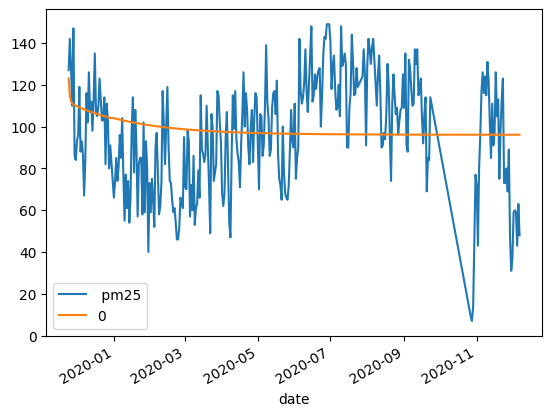

In [150]:
pd.concat([dfTest[' pm25'],forec],axis=1).plot()

# New Training ARIMA statsmodel

## Rolling forecast

In [151]:
X = dfnooutdate.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

In [152]:
history = [x for x in train]
predictions = list()

In [153]:
history

[array([39.]),
 array([81.]),
 array([94.]),
 array([91.]),
 array([98.]),
 array([64.]),
 array([65.]),
 array([113.]),
 array([132.]),
 array([109.]),
 array([97.]),
 array([73.]),
 array([87.]),
 array([103.]),
 array([112.]),
 array([100.]),
 array([90.]),
 array([83.]),
 array([97.]),
 array([121.]),
 array([139.]),
 array([134.]),
 array([128.]),
 array([81.]),
 array([67.]),
 array([63.]),
 array([54.]),
 array([73.]),
 array([48.]),
 array([62.]),
 array([103.]),
 array([72.]),
 array([82.]),
 array([46.]),
 array([24.]),
 array([41.]),
 array([53.]),
 array([49.]),
 array([73.]),
 array([65.]),
 array([98.]),
 array([66.]),
 array([45.]),
 array([21.]),
 array([46.]),
 array([61.]),
 array([58.]),
 array([112.]),
 array([96.]),
 array([97.]),
 array([68.]),
 array([59.]),
 array([104.]),
 array([120.]),
 array([119.]),
 array([98.]),
 array([85.]),
 array([114.]),
 array([91.]),
 array([53.]),
 array([59.]),
 array([68.]),
 array([87.]),
 array([78.]),
 array([53.]),
 array([8

In [154]:
dfTest.iloc[10]

 pm25    88.0
Name: 2019-12-04 00:00:00, dtype: float64

In [155]:
history_df = df(history)

In [156]:
history_df

,0
0,39.0
1,81.0
2,94.0
3,91.0
4,98.0
...,...
1357,74.0
1358,96.0
1359,106.0
1360,122.0


In [157]:
for t in range(len(test)):
 model = arima(history, order=(1, 1, 1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=125.852321, expected=127.000000
predicted=120.622322, expected=142.000000
predicted=129.586069, expected=128.000000
predicted=122.677067, expected=110.000000
predicted=112.956470, expected=147.000000
predicted=133.549210, expected=86.000000
predicted=100.356421, expected=84.000000
predicted=98.070405, expected=93.000000
predicted=102.008486, expected=96.000000
predicted=102.980423, expected=119.000000
predicted=115.353105, expected=88.000000
predicted=98.235966, expected=93.000000
predicted=100.228159, expected=87.000000
predicted=96.278663, expected=67.000000
predicted=84.268653, expected=84.000000
predicted=92.452490, expected=116.000000
predicted=109.797100, expected=102.000000
predicted=102.411051, expected=126.000000
predicted=115.883383, expected=107.000000
predicted=105.999736, expected=112.000000
predicted=108.888536, expected=98.000000
predicted=101.271723, expected=113.000000
predicted=109.433815, expected=135.000000
predicted=122.080784, expected=107.000000
predict

In [158]:
prediction_df = df(predictions)

In [159]:
prediction_df.index = dfTest.index
prediction_df

,0
date,
2019-11-24,125.852321
2019-11-25,120.622322
2019-11-26,129.586069
2019-11-27,122.677067
2019-11-28,112.956470
...,...
2020-12-03,68.822460
2020-12-04,68.574063
2020-12-05,67.290008


## predict function

In [160]:
model = arima(history, order=(1, 1, 1))
model_fit = model.fit()

newforc = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ='levels')

In [161]:
newforc_df = df(newforc)

In [162]:
newforc_df.index = dfTest.index

In [163]:
newforc_df

,0
date,
2019-11-24,125.833452
2019-11-25,120.615661
2019-11-26,129.619710
2019-11-27,122.723659
2019-11-28,112.982451
...,...
2020-12-03,68.653444
2020-12-04,68.425071
2020-12-05,67.167132


<Axes: xlabel='date'>

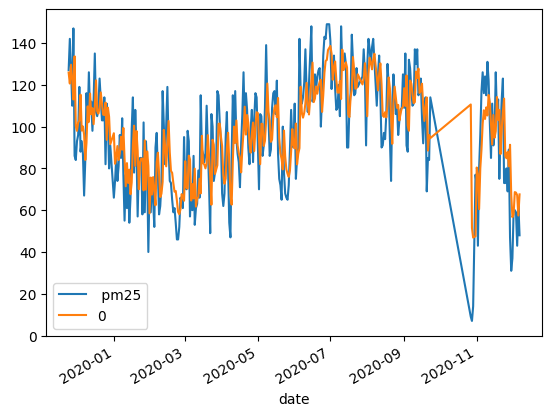

In [164]:
pd.concat([dfTest[' pm25'],newforc_df],axis=1).plot()

<Axes: xlabel='date'>

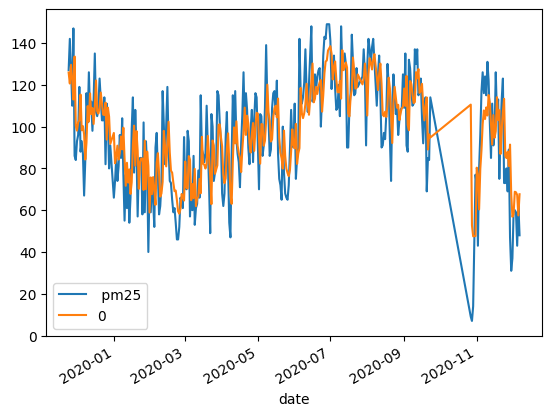

In [165]:
pd.concat([dfTest[' pm25'],prediction_df],axis=1).plot()

# Predic future outcome

In [166]:
dfnooutdate.tail()

,pm25
date,
2020-12-03,60.0
2020-12-04,59.0
2020-12-05,43.0
2020-12-06,63.0
2020-12-07,48.0


In [167]:
start = dfnooutdate.index[len(dfnooutdate)-1]
start

Timestamp('2020-12-07 00:00:00')

In [174]:
# forecast1=newfit.predict(n_periods=390, return_conf_int=False)
# forecast_range1=pd.date_range(start='2020-12-07', periods=100, freq= 'D')
# forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range1,columns=['Prediction'])
X = dfnooutdate.values
size = int(len(X) * 1)
Train, Test = X[0:size], X[size:len(X)]

dat = [x for x in Train]

model1 = arima(dat, order=(1, 1, 1))
model1_fit = model.fit()


newforc1 = model1_fit.predict(start = 1, end = 50, typ='levels')
newforc1_df = df(newforc1)
newforc1_df = newforc1_df.rename(columns={'0':' pm25'})

In [175]:
newforc1

array([ 38.99524498,  70.36015909,  81.68122743,  81.91633075,
        87.84421707,  68.0308791 ,  68.11974949,  96.72922924,
       109.91491176,  98.70570938,  92.7326227 ,  79.17179531,
        86.69173986,  95.95802365, 101.78550628,  95.82699183,
        90.47648692,  86.43654548,  94.11977623, 108.03393039,
       119.3819342 , 118.21084722, 116.14113738,  90.47605997,
        81.74266856,  78.24234968,  71.87217096,  81.14425563,
        66.31414222,  72.71921288,  95.03283573,  78.15238924,
        83.30101886,  62.83045235,  48.99871187,  56.55111238,
        62.05514754,  59.04717946,  71.78997787,  67.36635403,
        85.82932638,  68.73921359,  56.64133451,  42.11525287,
        54.51143386,  62.29113904,  60.48898809,  90.81104945,
        83.50878477,  85.10133393])

In [176]:
len(dfTest)

341

In [177]:
dfTest.index[50]

Timestamp('2020-01-15 00:00:00')

In [178]:
# forecast1
forecast_range1=pd.date_range(start=dfnooutdate.index[-1], periods=50, freq= 'D')
# forecast_range1
newforc1_df.index = forecast_range1
newforc1_df

,0
2020-12-07,38.995245
2020-12-08,70.360159
2020-12-09,81.681227
2020-12-10,81.916331
2020-12-11,87.844217
2020-12-12,68.030879
2020-12-13,68.119749
2020-12-14,96.729229
2020-12-15,109.914912
2020-12-16,98.705709


<Axes: >

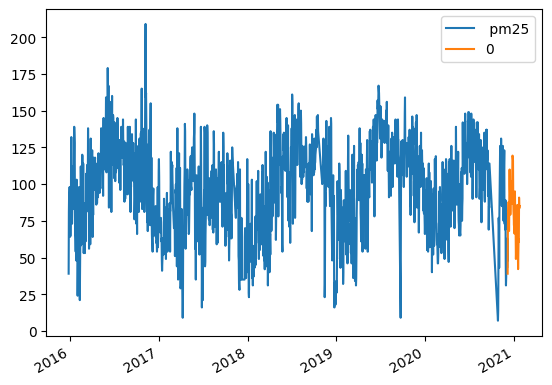

In [179]:
pd.concat([dfnooutdate[' pm25'], newforc1_df],axis=1).plot()

Big fucking mistakes: never drop important data and never fill na